In [12]:
from imutils import contours
from skimage import measure
import numpy as np
import argparse
import imutils
import cv2
from PIL import Image

In [46]:
image=cv2.imread('/home/jmandivarapu1/GP/Test12.jpg')

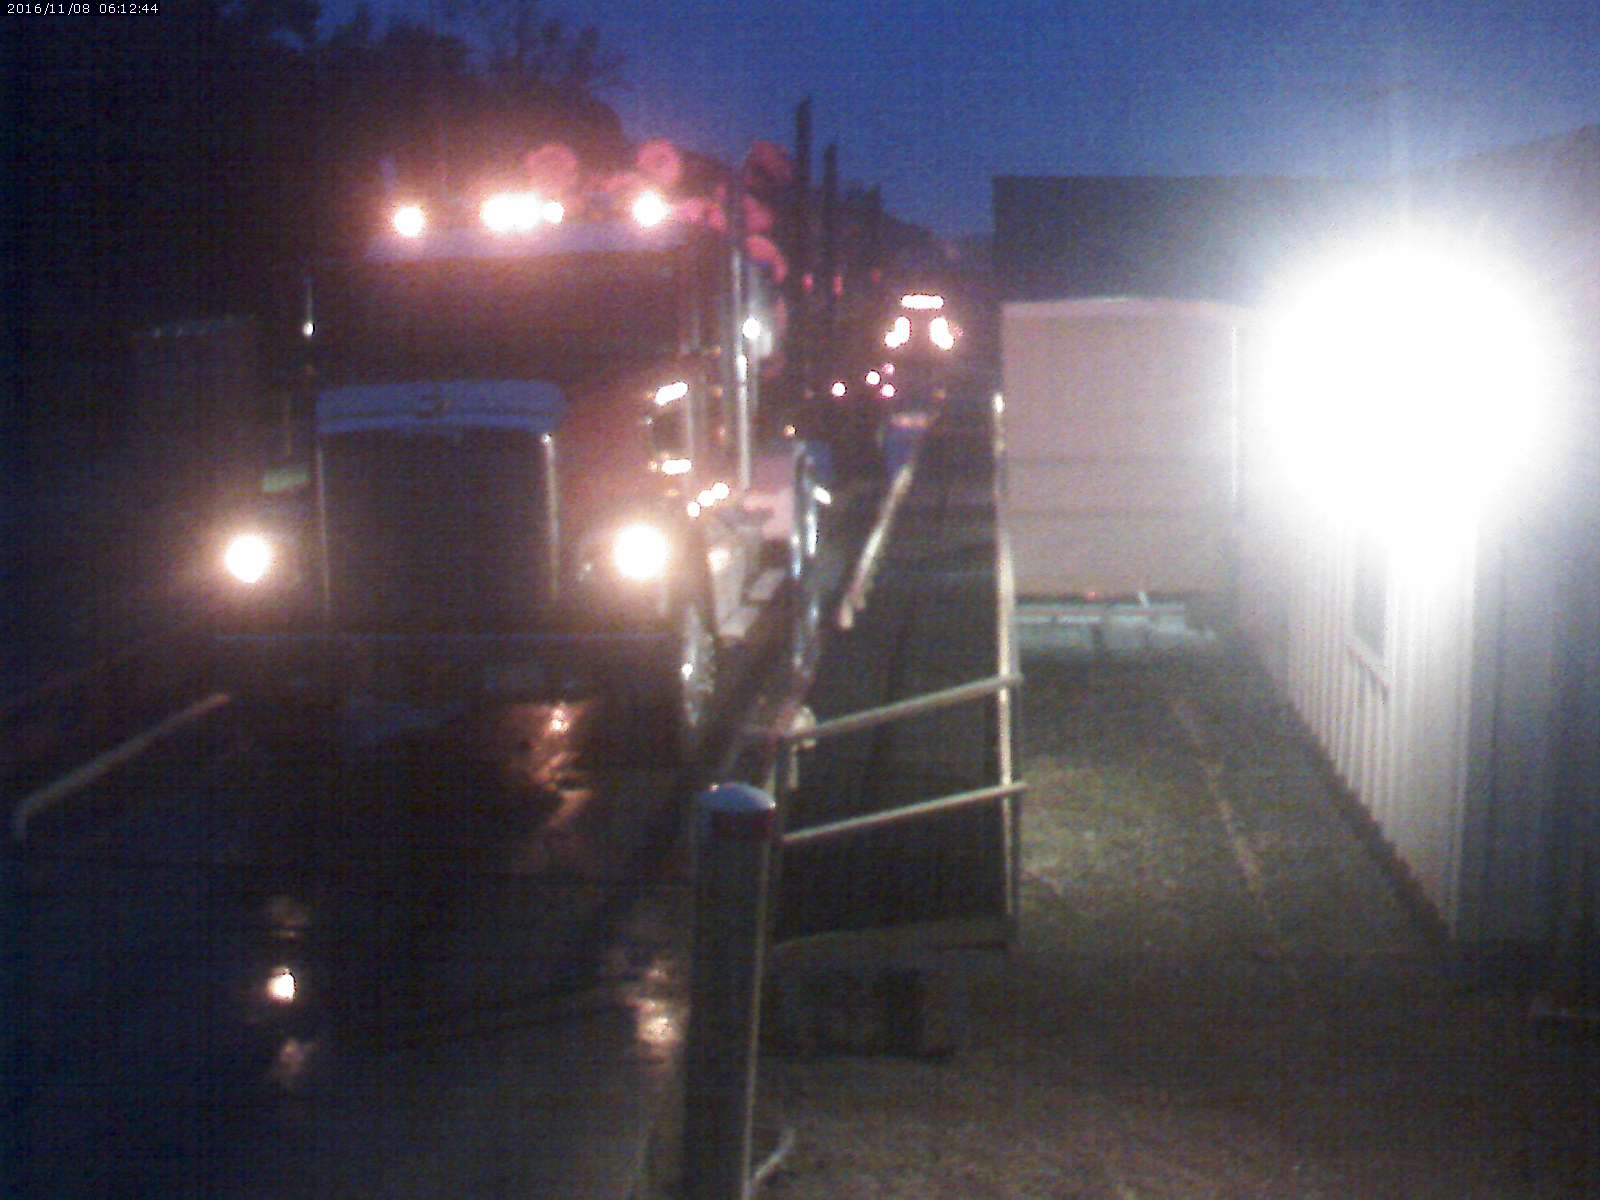

In [14]:
Image.open('Test12.jpg')

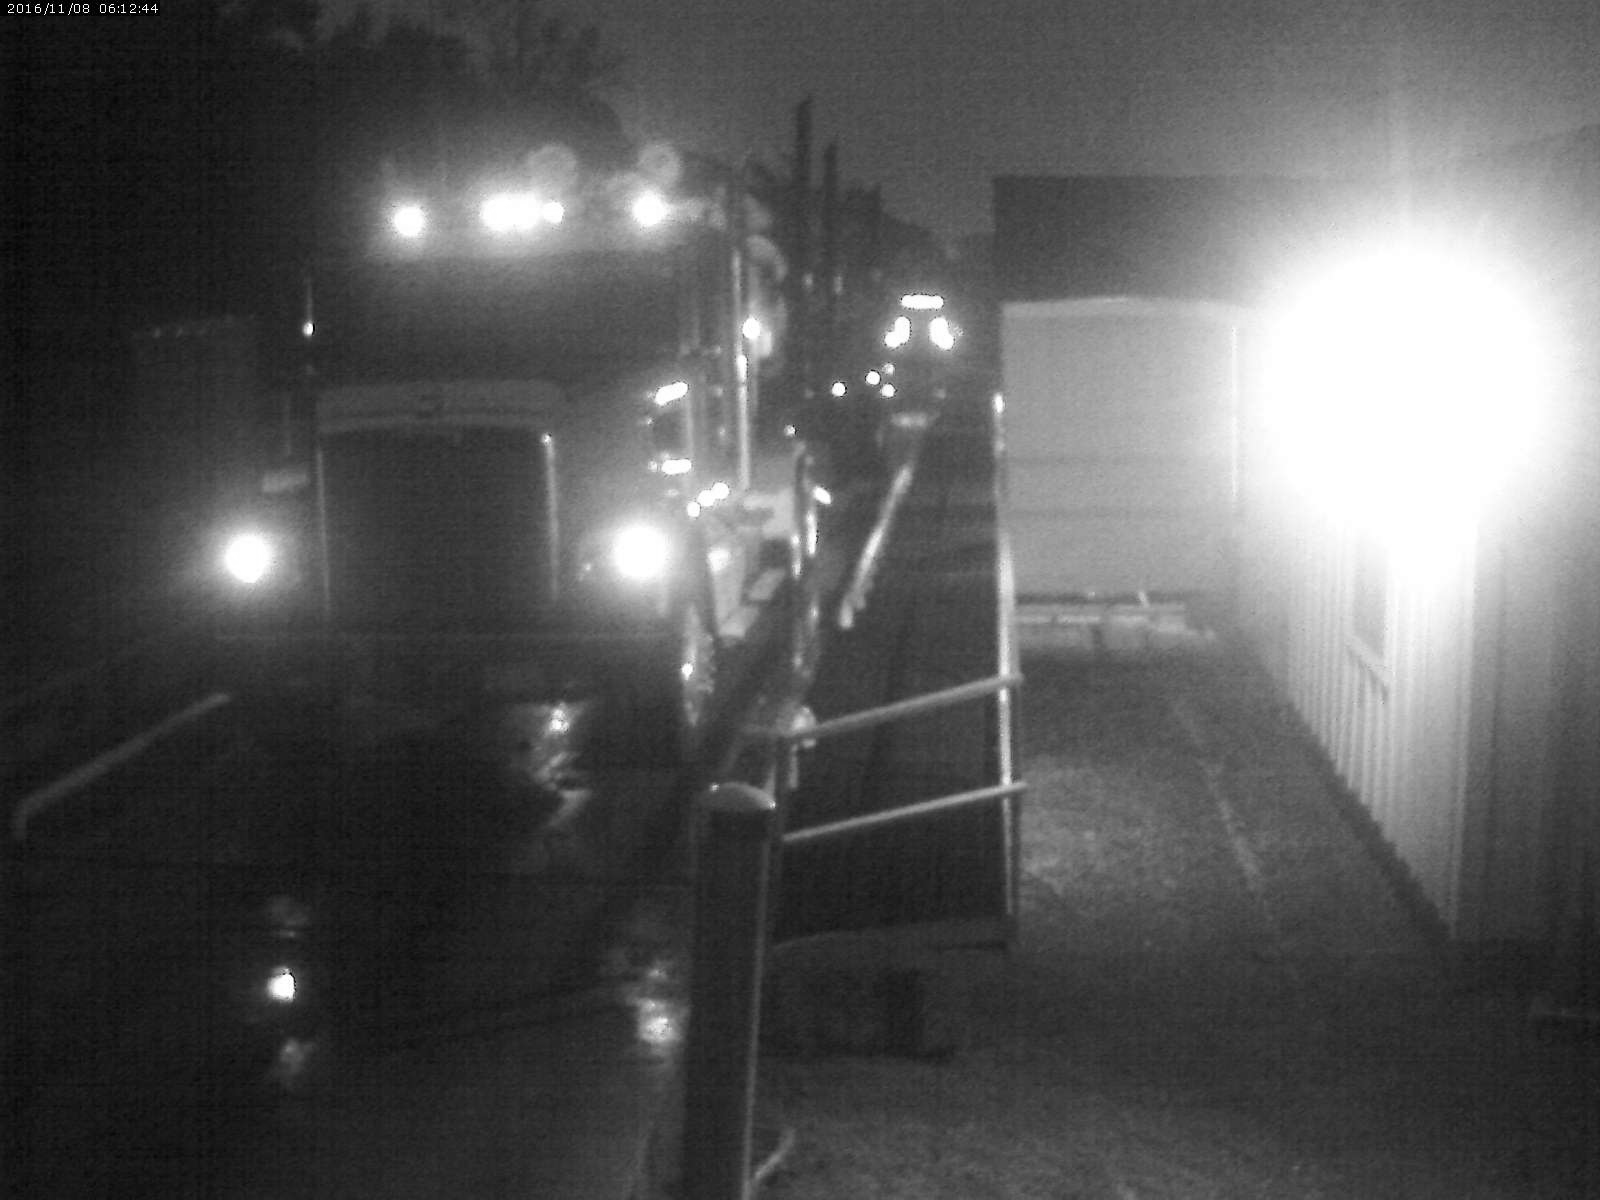

In [15]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite( "grey1.png", gray )
Image.open('grey1.png')

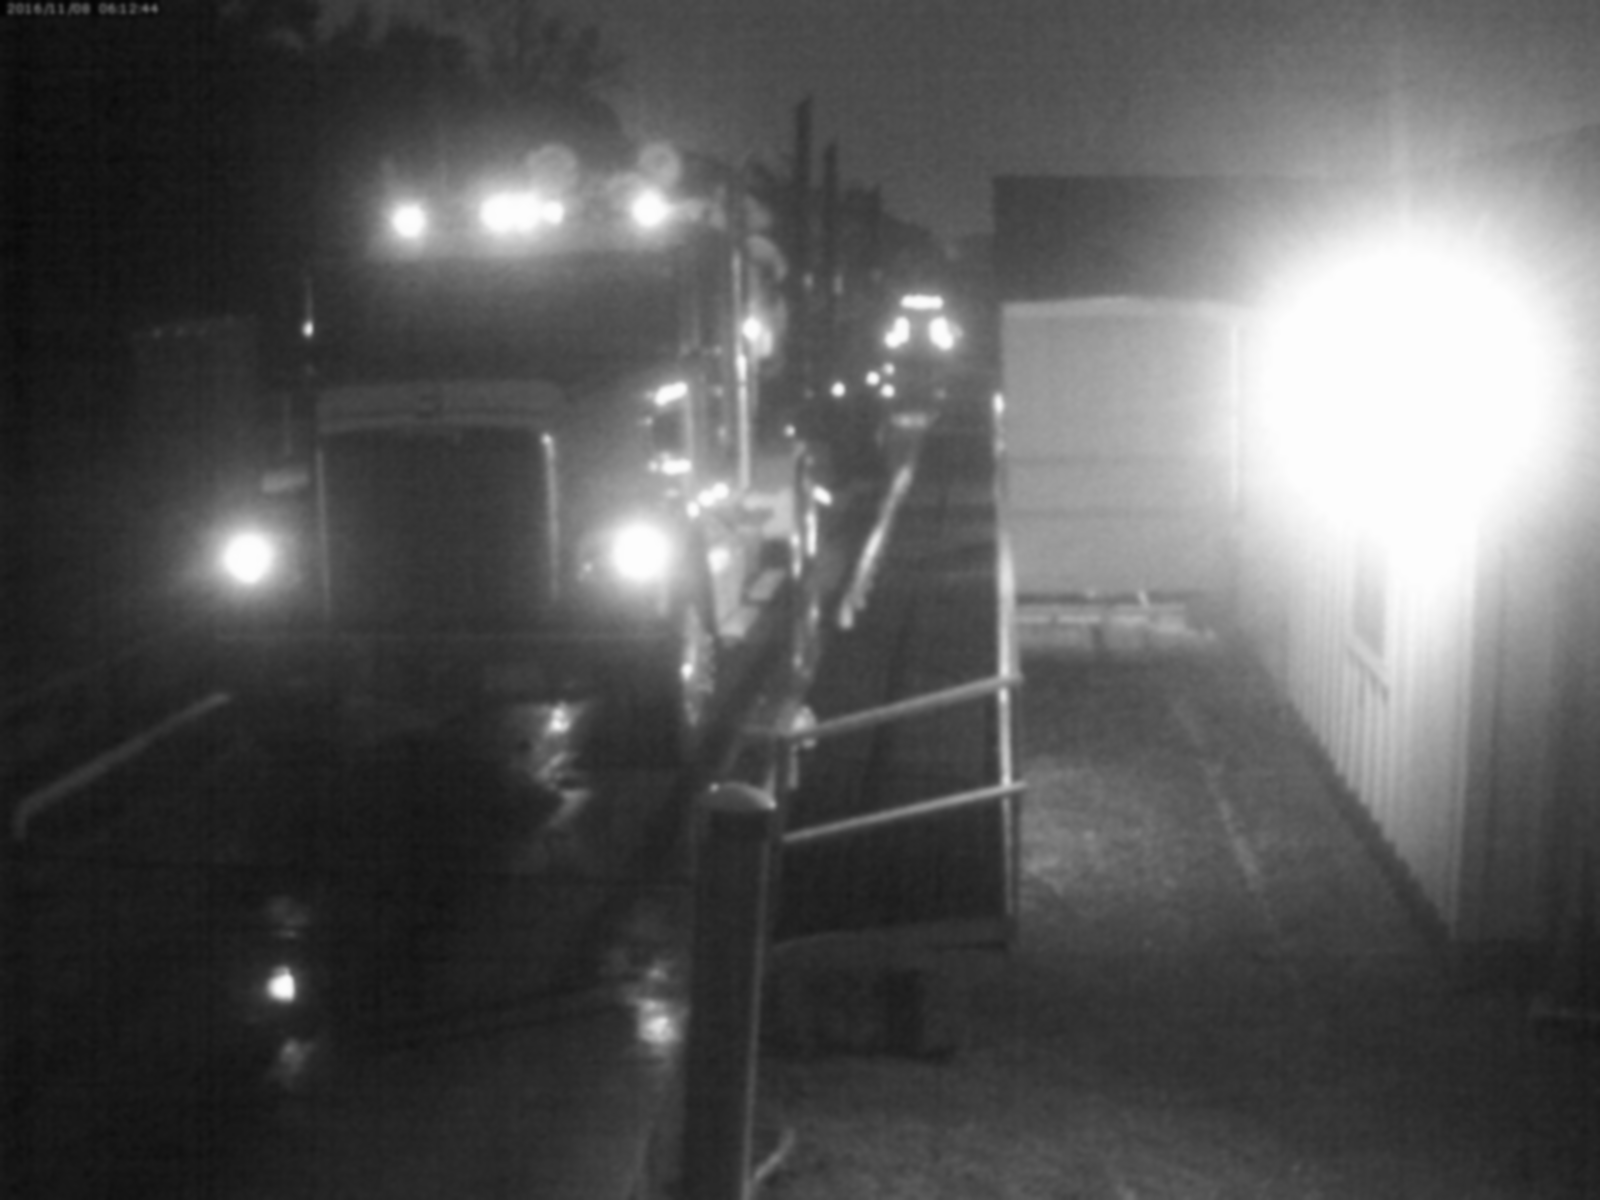

In [16]:
blurred = cv2.GaussianBlur(gray, (11, 11), 0)
cv2.imwrite( "blur.png", blurred )
Image.open('blur.png')

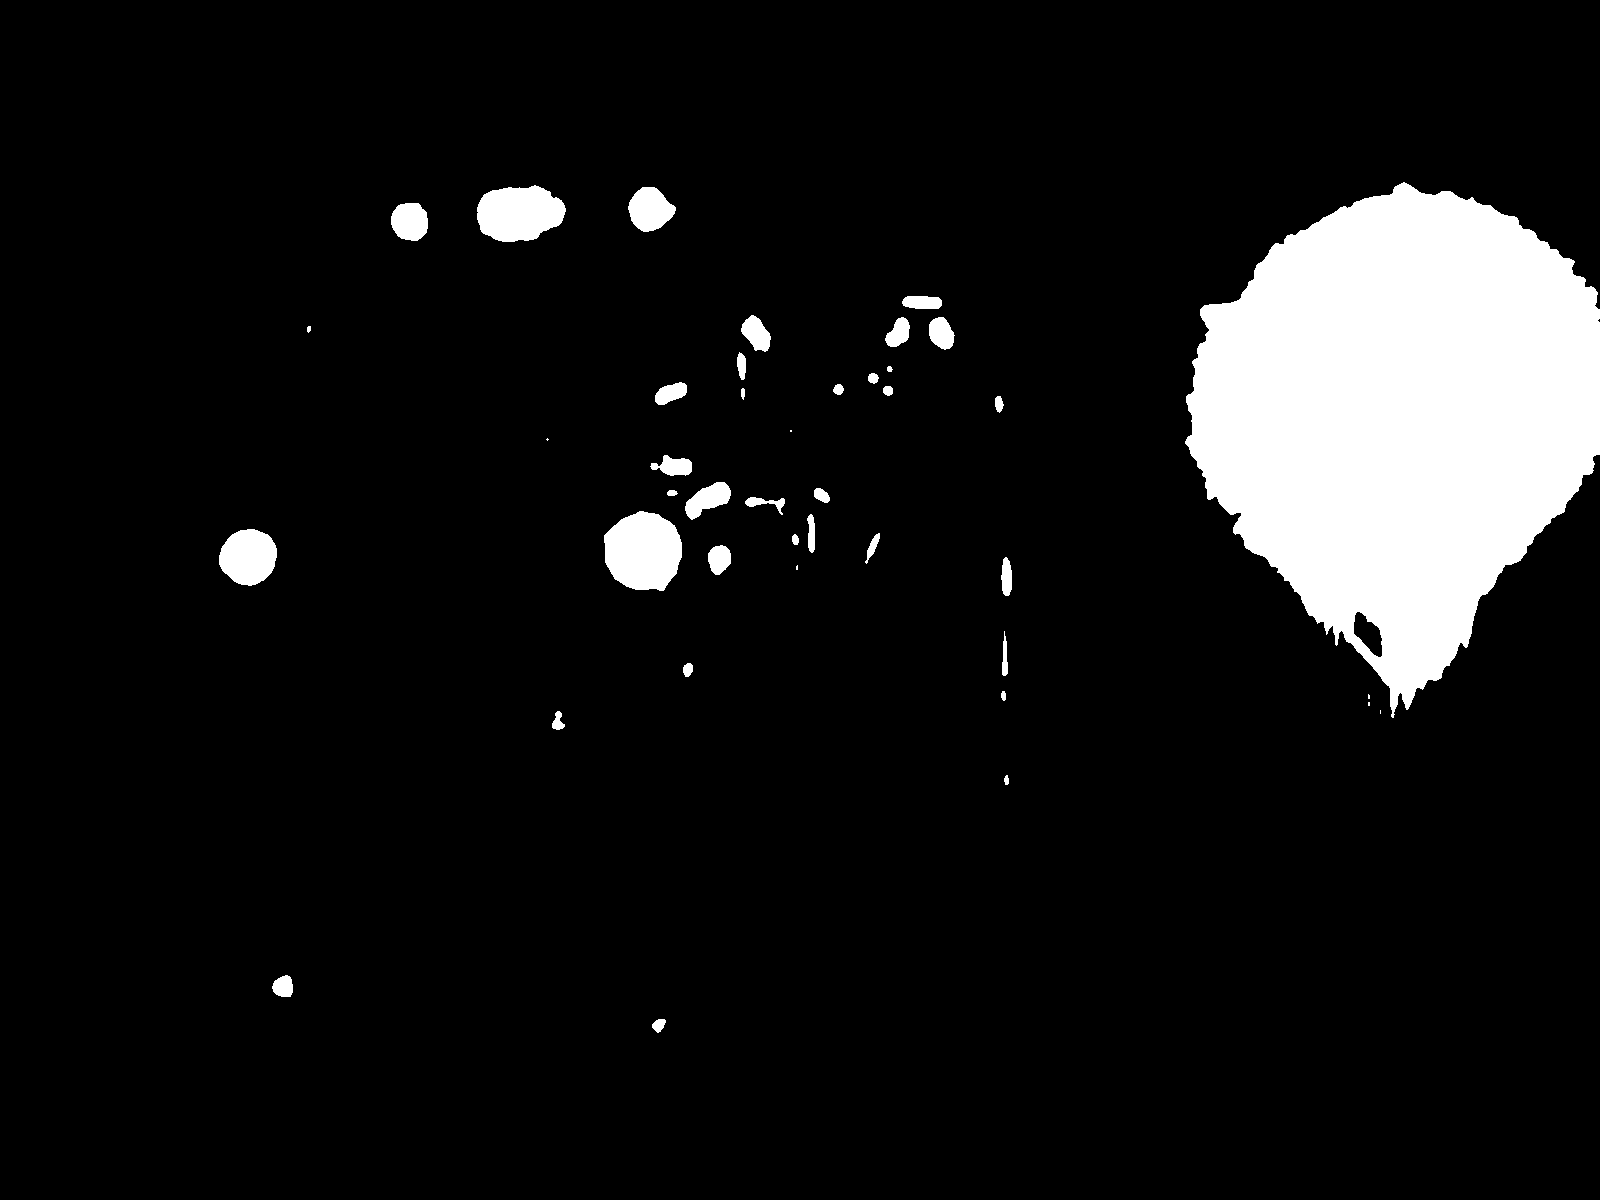

In [18]:
# threshold the image to reveal light regions in the
# blurred image
thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)[1]
cv2.imwrite( "thresh.png", thresh )
Image.open('thresh.png')

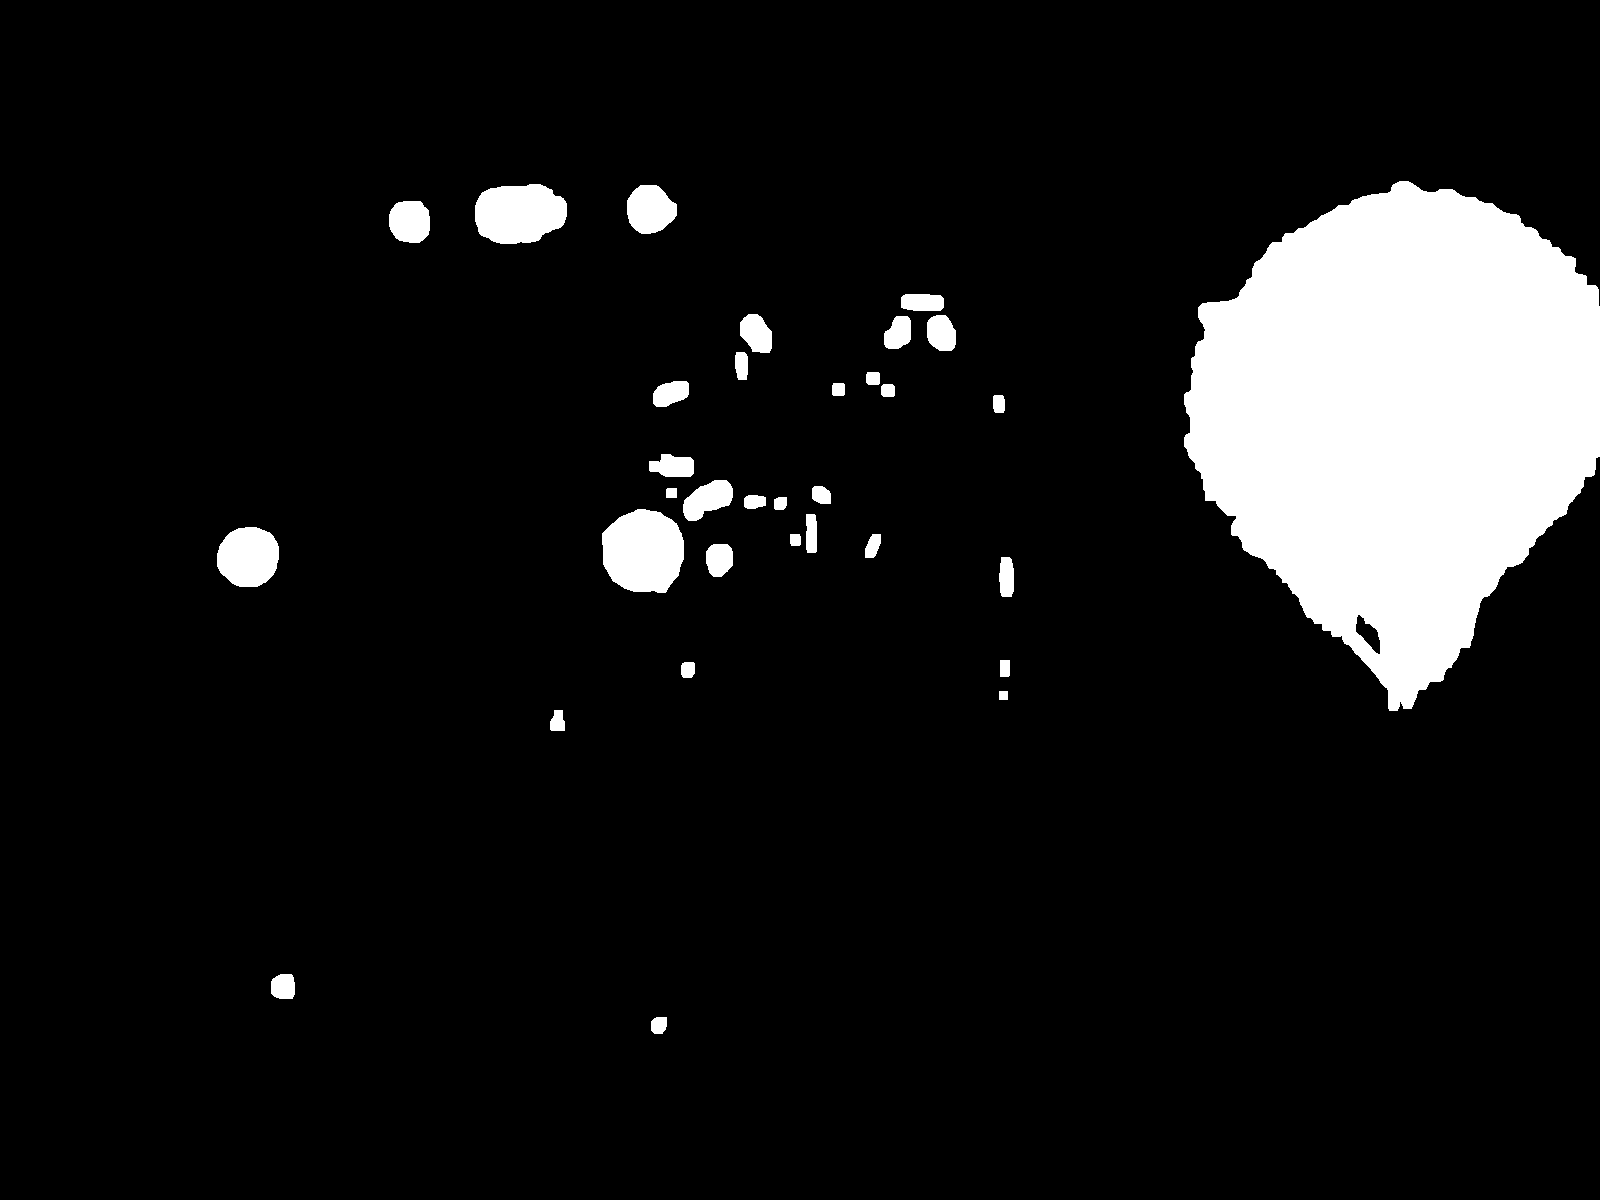

In [19]:
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=4)
cv2.imwrite( "thresh.png", thresh )
Image.open('thresh.png')

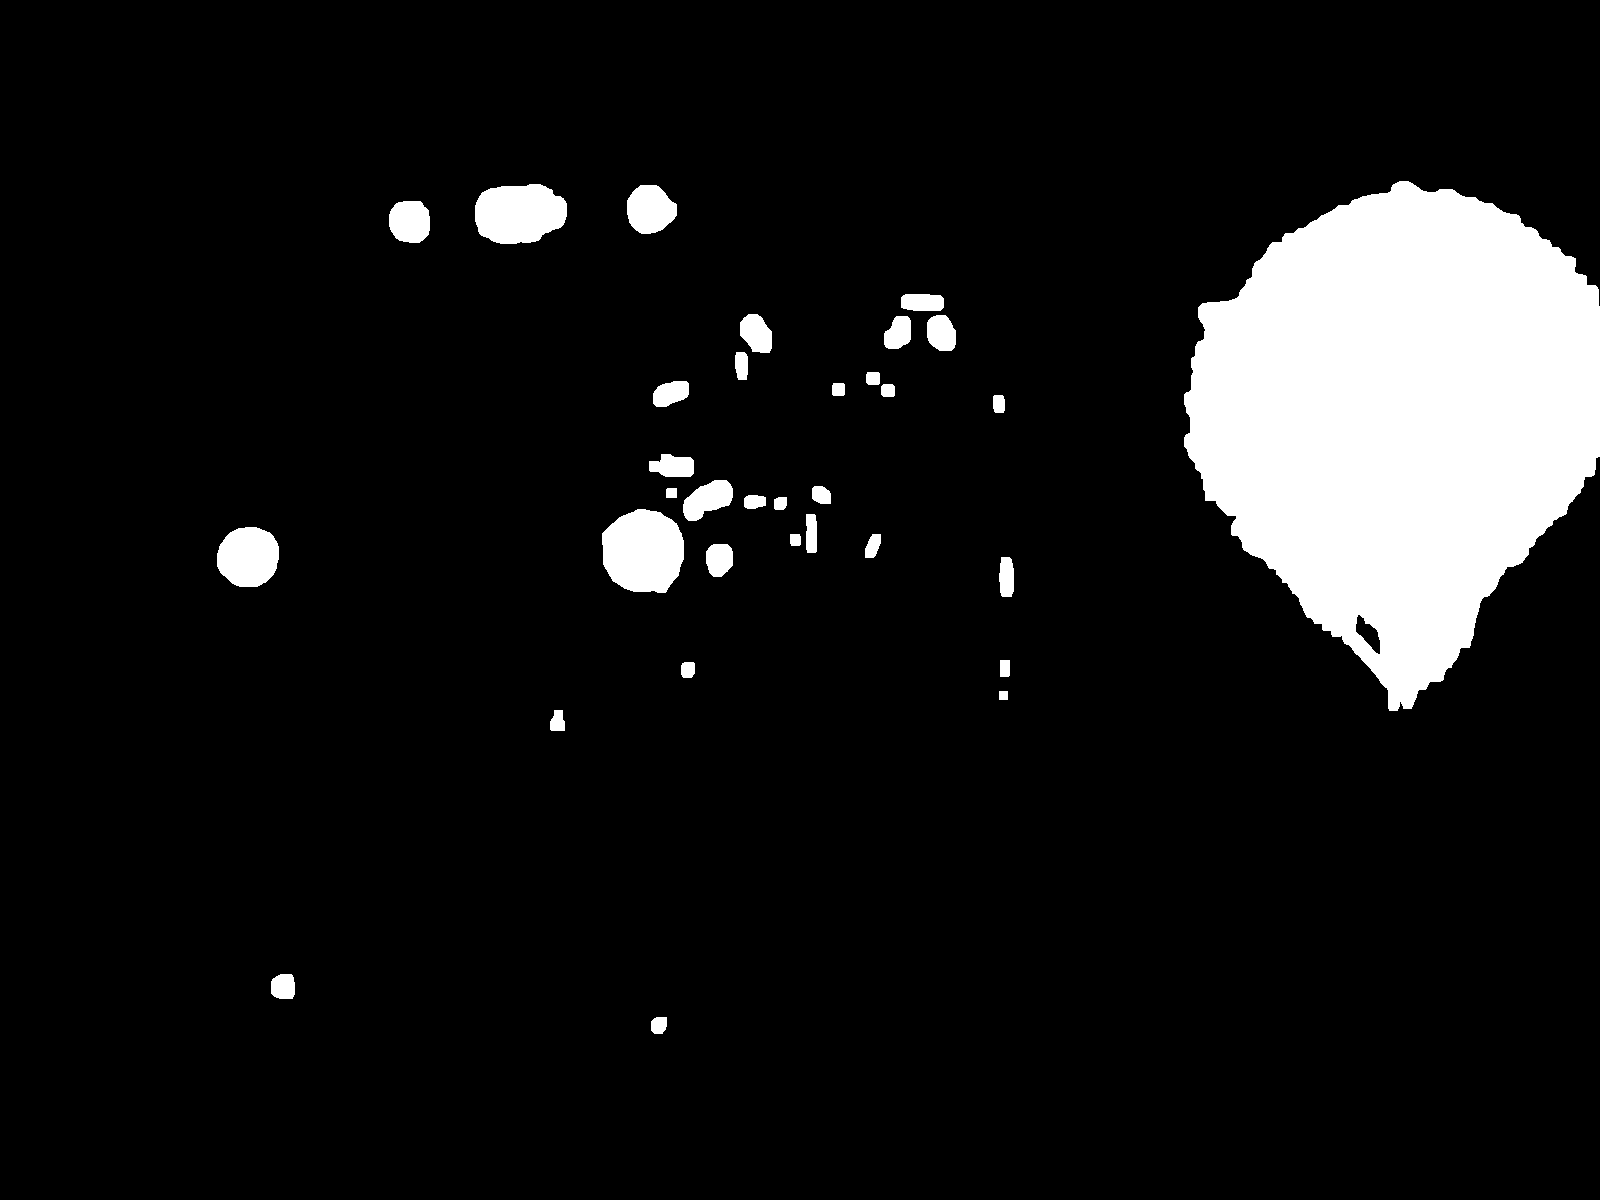

In [22]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
cv2.imwrite( "morph.png", thresh )
Image.open('morph.png')

In [34]:
# perform a connected component analysis on the thresholded
# image, then initialize a mask to store only the "large"
# components
labels = measure.label(thresh, neighbors=8, background=0)
mask = np.zeros(thresh.shape, dtype="uint8")
 
# loop over the unique components
for label in np.unique(labels):
	# if this is the background label, ignore it
	if label == 0:
		continue
 
	# otherwise, construct the label mask and count the
	# number of pixels 
	labelMask = np.zeros(thresh.shape, dtype="uint8")
	labelMask[labels == label] = 255
	numPixels = cv2.countNonZero(labelMask)
 
	# if the number of pixels in the component is sufficiently
	# large, then add it to our mask of "large blobs"
	if numPixels > 300:
		mask = cv2.add(mask, labelMask)

In [55]:
# find the contours in the mask, then sort them from left to
# right
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
cnts = contours.sort_contours(cnts)[0]
cnts


(array([[[245, 527]],
 
        [[244, 528]],
 
        [[238, 528]],
 
        [[237, 529]],
 
        [[236, 529]],
 
        [[235, 530]],
 
        [[234, 530]],
 
        [[233, 531]],
 
        [[232, 531]],
 
        [[231, 532]],
 
        [[230, 532]],
 
        [[225, 537]],
 
        [[225, 538]],
 
        [[223, 540]],
 
        [[223, 541]],
 
        [[220, 544]],
 
        [[220, 545]],
 
        [[219, 546]],
 
        [[219, 549]],
 
        [[218, 550]],
 
        [[218, 552]],
 
        [[217, 553]],
 
        [[217, 566]],
 
        [[218, 567]],
 
        [[218, 568]],
 
        [[219, 569]],
 
        [[219, 570]],
 
        [[220, 571]],
 
        [[220, 572]],
 
        [[223, 575]],
 
        [[224, 575]],
 
        [[232, 583]],
 
        [[233, 583]],
 
        [[234, 584]],
 
        [[235, 584]],
 
        [[236, 585]],
 
        [[238, 585]],
 
        [[239, 586]],
 
        [[257, 586]],
 
        [[258, 585]],
 
        [[259, 585]],
 
        [[260, 5

In [49]:
# loop over the contours

for (i, c) in enumerate(cnts):
	# draw the bright spot on the image
    #cv2.imwrite( "otput14.png", image )
    (x, y, w, h) = cv2.boundingRect(c)
    ((cX, cY), radius) = cv2.minEnclosingCircle(c)
    cv2.imwrite( "otput12.png", image )
    #print(radius)
    if(radius<100):
        print(radius)
        cv2.circle(image, (int(cX), int(cY)), int(radius),(0, 0, 255), 3)
        cv2.putText(image, "#{}".format(i + 1), (x, y - 15),
        cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)


33.0439567566
14.763209343
23.4530696869
47.2678070068
46.1961746216
26.8563461304
23.487613678
20.7603130341
28.413816452
17.9881763458
14.8280658722
22.3595428467
20.1113929749
19.1660270691
22.2346439362
19.8725948334
20.7347450256


In [52]:
cv2.imwrite( "otput1.png", image )


True

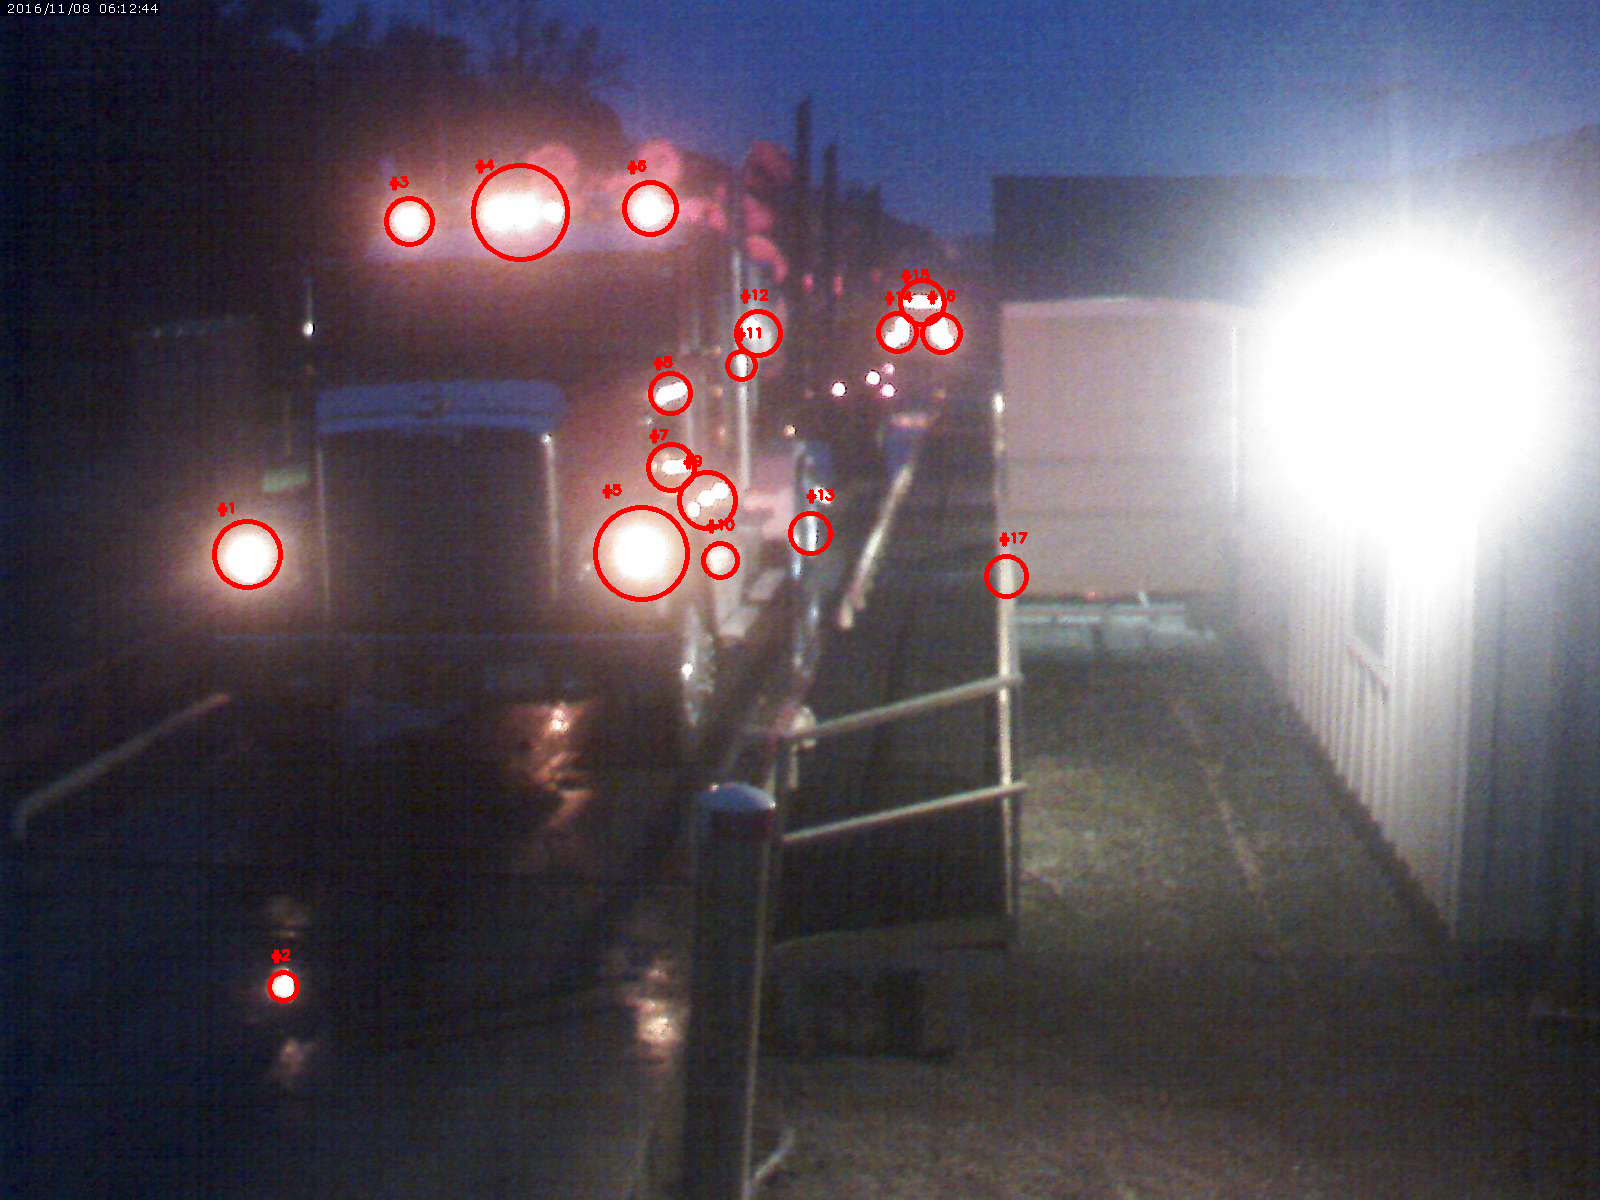

In [53]:
Image.open('otput1.png')